In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def alphabet_to_mat_position(x, alphabet):
    return alphabet[x]

def mat_position_to_alphabet(x, alphabet):
    inv_map = {v: k for k, v in alphabet.items()}
    return inv_map[x]

alph = {'A': 0, 'R': 1, 'N': 2, 'D': 3, 'C': 4, 'Q': 5 ,'E': 6, 'G': 7, 'H': 8, 'I': 9, 'L': 10, 'K': 11, 'M': 12, 'F': 13, 'P': 14, 'S': 15, 'T': 16, 'W': 17, 'Y': 18, 'V': 19}



In [10]:
def make_DMS_matrix(path, alph):
    df = pd.read_csv(path).drop(['Unnamed: 0.1', 'Unnamed: 0', 'bla'], axis = 1)
    df = df.rename(columns={"/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_1.pt": "esm1v_t33_650M_UR90S_1", "/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_2.pt": "esm1v_t33_650M_UR90S_2","/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_3.pt": "esm1v_t33_650M_UR90S_3","/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_4.pt": "esm1v_t33_650M_UR90S_4", "/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_5.pt": "esm1v_t33_650M_UR90S_5"})
    df['ensemble'] = df[['esm1v_t33_650M_UR90S_1', 'esm1v_t33_650M_UR90S_2', 'esm1v_t33_650M_UR90S_3', 'esm1v_t33_650M_UR90S_4', 'esm1v_t33_650M_UR90S_5']].mean(axis=1)
    df['values'] = [int(i[1:-1]) - 1 for i in df['mutant'].values]
    df['mutation_mat_position'] = [alphabet_to_mat_position(i[-1], alph) for i in df['mutant'].values]

    temp_1 = np.array(list(df[['values', 'ensemble']].groupby('values').ensemble.apply(list).reset_index()['ensemble'].values))
    temp_2 = np.array(list(df[['values', 'mutation_mat_position']].groupby('values').mutation_mat_position.apply(list).reset_index()['mutation_mat_position'].values))
    
    full_mutations_matrix = np.zeros((temp_1.shape[0], 20))*np.nan
    for j in range(temp_1.shape[0]):
        for i in zip(temp_1[j, :], temp_2[j, :]):
            full_mutations_matrix[j, i[1]] = i[0]

    return full_mutations_matrix
    
def plot_DMS_heatmap(full_mutations_matrix, alph, ref_seq = None, figsize = (30, 100)):
    
    alphabet = ''.join(alph.keys())

    # Create a heatmap of the mutations
    fig, ax = plt.subplots(figsize = figsize)
    im = ax.imshow(full_mutations_matrix, cmap='RdYlBu')

    ax.set_xticks(np.arange(len(alphabet)))
    ax.set_xticklabels(list(alphabet))
    
    yticks = np.arange(0, full_mutations_matrix.shape[0], 10) - 1
    yticks[0] = 0
    
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks + 1)

    # Rotate the x-axis labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor");

    cbar = ax.figure.colorbar(im, ax=ax, fraction = 0.01)
    
    return fig, ax

# ORF2

## Import and creation of the DMS matrix

In [11]:
ref_seq_ORF2 = "MTGSNSHITILTLNINGLNSAIKRHRLASWIKSQDPSVCCIQETHLTCRDTHRLKIKGWRKIYQANGKQKKAGVAILVSDKTDFKPTKIKRDKEGHYIMVKGSIQQEELTILNIYAPNTGAPRFIKQVLSDLQRDLDSHTLIMGDFNTPLSTLDRSTRQKVNKDTQELNSALHQADLIDIYRTLHPKSTEYTFFSAPHHTYSKIDHIVGSKALLSKCKRTEIITNYLSDHSAIKLELRIKNLTQSRSTTWKLNNLLLNDYWVHNEMKAEIKMFFETNENKDTTYQNLWDAFKAVCRGKFIALNAYKRKQERSKIDTLTSQLKELEKQEQTHSKASRRQEITKIRAELKEIETQKTLQKINESRSWFFERINKIDRPLARLIKKKREKNQIDTIKNDKGDITTDPTEIQTTIREYYKHLYANKLENLEEMDTFLDTYTLPRLNQEEVESLNRPITGSEIVAIINSLPTKKSPGPDGFTAEFYQRYKEELVPFLLKLFQSIEKEGILPNSFYEASIILIPKPGRDTTKKENFRPISLMNIDAKILNKILANRIQQHIKKLIHHDQVGFIPGMQGWFNIRKSINVIQHINRAKDKNHMIISIDAEKAFDKIQQPFMLKTLNKLGIDGTYFKIIRAIYDKPTANIILNGQKLEAFPLKTGTRQGCPLSPLLFNIVLEVLARAIRQEKEIKGIQLGKEEVKLSLFADDMIVYLENPIVSAQNLLKLISNFSKVSGYKINVQKSQAFLYTNNRQTESQIMGELPFTIASKRIKYLGIQLTRDVKDLFKENYKPLLKEIKEETNKWKNIPCSWVGRINIVKMAILPKVIYRFNAIPIKLPMTFFTELEKTTLKFIWNQKRARIAKSILSQKNKAGGITLPDFKLYYKATVTKTAWYWYQNRDIDQWNRTEPSEIMPHIYNYLIFDKPEKNKQWGKDSLFNKWCWENWLAICRKLKLDPFLTPYTKINSRWIKDLNVKPKTIKTLEENLGITIQDIGVGKDFMSKTPKAMATKDKIDKWDLIKLKSFCTAKETTIRVNRQPTTWEKIFATYSSDKGLISRIYNELKQIYKKKTNNPIKKWAKDMNRHFSKEDIYAAKKHMKKCSSSLAIREMQIKTTMRYHLTPVRMAIIKKSGNNRCWRGCGEIGTLLHCWWDCKLVQPLWKSVWRFLRDLELEIPFDPAIPLLGIYPNEYKSCCYKDTCTRMFIAALFTIAKTWNQPKCPTMIDWIKKMWHIYTMEYYAAIKNDEFISFVGTWMKLETIILSKLSQEQKTKHRIFSLIGGN"
sequence_chunk_1 = ref_seq_ORF2[:1022]
sequence_chunk_2 = ref_seq_ORF2[-1022:]

In [12]:
len(ref_seq_ORF2)

1275

In [13]:
chunk_1_df_ORF2 = pd.read_csv('/Users/federico/Integra/Projects/ESM/variant_prediction/Leandro_ORF2/ORF2_chunk1.csv').drop(['Unnamed: 0.1', 'Unnamed: 0', '--'], axis = 1)
chunk_1_df_ORF2 = chunk_1_df_ORF2.rename(columns={"/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_1.pt": "esm1v_t33_650M_UR90S_1", "/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_2.pt": "esm1v_t33_650M_UR90S_2","/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_3.pt": "esm1v_t33_650M_UR90S_3","/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_4.pt": "esm1v_t33_650M_UR90S_4", "/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_5.pt": "esm1v_t33_650M_UR90S_5"})
chunk_1_df_ORF2['ensemble'] = chunk_1_df_ORF2[['esm1v_t33_650M_UR90S_1', 'esm1v_t33_650M_UR90S_2', 'esm1v_t33_650M_UR90S_3', 'esm1v_t33_650M_UR90S_4', 'esm1v_t33_650M_UR90S_5']].mean(axis=1)
chunk_1_df_ORF2['values'] = [int(i[1:-1]) - 1 for i in chunk_1_df_ORF2['mutant'].values]
chunk_1_df_ORF2['mutation_mat_position'] = [alphabet_to_mat_position(i[-1], alph) for i in chunk_1_df_ORF2['mutant'].values]

chunk_2_df_ORF2 = pd.read_csv('/Users/federico/Integra/Projects/ESM/variant_prediction/Leandro_ORF2/ORF2_chunk2.csv').drop(['Unnamed: 0.1', 'Unnamed: 0', '--'], axis = 1)
chunk_2_df_ORF2 = chunk_2_df_ORF2.rename(columns={"/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_1.pt": "esm1v_t33_650M_UR90S_1", "/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_2.pt": "esm1v_t33_650M_UR90S_2","/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_3.pt": "esm1v_t33_650M_UR90S_3","/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_4.pt": "esm1v_t33_650M_UR90S_4", "/content/drive/Shareddrives/ESM_for_variant_prediction/esm1v_t33_650M_UR90S_5.pt": "esm1v_t33_650M_UR90S_5"})
chunk_2_df_ORF2['ensemble'] = chunk_2_df_ORF2[['esm1v_t33_650M_UR90S_1', 'esm1v_t33_650M_UR90S_2', 'esm1v_t33_650M_UR90S_3', 'esm1v_t33_650M_UR90S_4', 'esm1v_t33_650M_UR90S_5']].mean(axis=1)
chunk_2_df_ORF2['values'] = [int(i[1:-1]) - 1 for i in chunk_2_df_ORF2['mutant'].values]
chunk_2_df_ORF2['mutation_mat_position'] = [alphabet_to_mat_position(i[-1], alph) for i in chunk_2_df_ORF2['mutant'].values]

In [14]:
temp_1 = np.array(list(chunk_1_df_ORF2[['values', 'ensemble']].groupby('values').ensemble.apply(list).reset_index()['ensemble'].values))
temp_2 = np.array(list(chunk_1_df_ORF2[['values', 'mutation_mat_position']].groupby('values').mutation_mat_position.apply(list).reset_index()['mutation_mat_position'].values))

a = np.zeros((1022, 20))*np.nan
for j in range(1022):
    for i in zip(temp_1[j, :], temp_2[j, :]):
        a[j, i[1]] = i[0]
        
del temp_1, temp_2
        
temp_1 = np.array(list(chunk_2_df_ORF2[['values', 'ensemble']].groupby('values').ensemble.apply(list).reset_index()['ensemble'].values))
temp_2 = np.array(list(chunk_2_df_ORF2[['values', 'mutation_mat_position']].groupby('values').mutation_mat_position.apply(list).reset_index()['mutation_mat_position'].values))

b = np.zeros((1022, 20))*np.nan
for j in range(1022):
    for i in zip(temp_1[j, :], temp_2[j, :]):
        b[j, i[1]] = i[0]
        
del temp_1, temp_2

DMS_matrix_ORF2 = np.vstack([a[:800, :], b[-475:, :]])

DMS_matrix_ORF2[DMS_matrix_ORF2 == 0.] = np.nan

del a, b

The line below produces an histogram of the scores obtained by the model

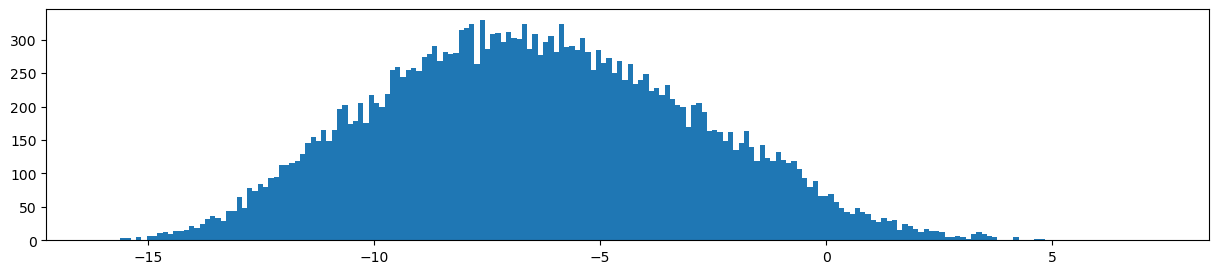

In [15]:
fig, ax = plt.subplots(figsize = (15, 3))
plt.hist(DMS_matrix_ORF2.flatten(), bins = 200);

The line below produces a heatmap for the DMS. The positions containing the wild type AA contain a nan value, that in the heatmap is a white square. 
The other values contain a score of each mutation, negative means that this mutation is deleterious respect to the wild tipe AA, positive means that that mutation is a good mutation for that AA. 

One way in which we first evaluated whether the model worked or not on PB and Cas9 was to see the effect of mutations to positions known to be very delicate and potentially damaging for the protein. 

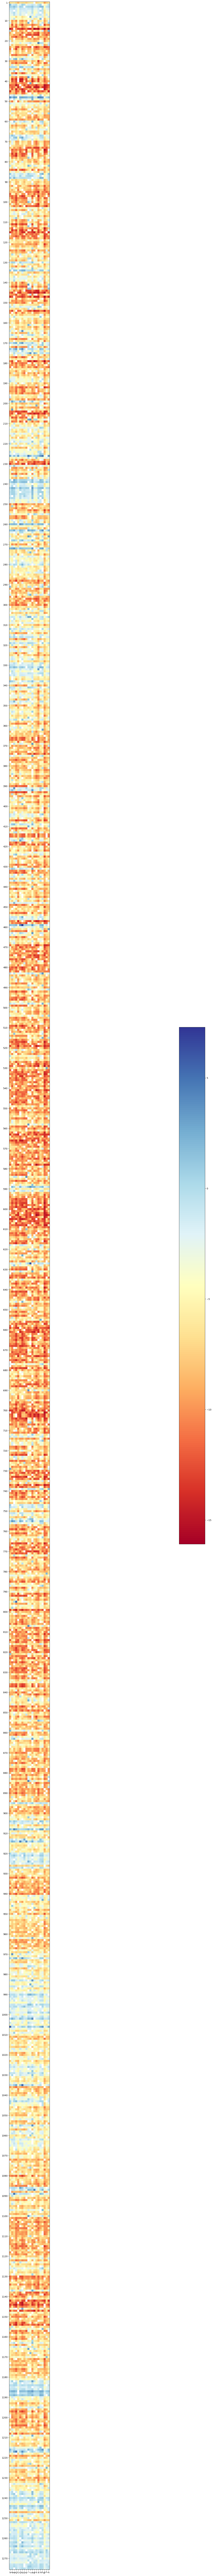

In [16]:
plot_DMS_heatmap(DMS_matrix_ORF2, alph, figsize=(200,200));

The following cell plots the profile of the mutations along the protein. I also coloured the background according to the domains (which in this case are referred to Cas9 domains). You can change it to put your domains there. This can be helpful to visualize the domains that on average contain more delicate or more variable AA. It can give another insight into how the algorithm worked for your protein. 

/var/folders/db/q5dl1169569gfpkptzxnmp7h0000gn/T/ipykernel_6406/3913226946.py:20: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


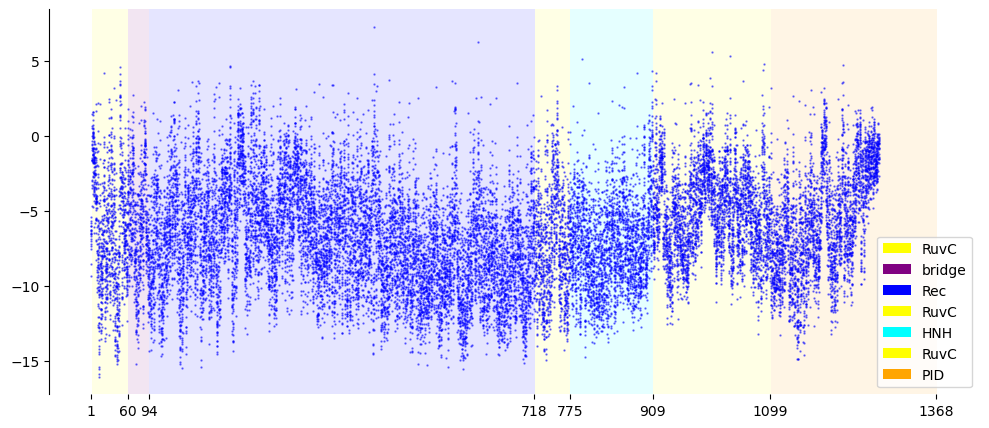

In [17]:
fig, ax = plt.subplots(1, figsize = (12, 5))

ax.axvspan(xmin=1,    xmax=60,   ymin=0, linewidth=0, color='yellow',     alpha = 0.1, label = 'RuvC');
ax.axvspan(xmin=60,   xmax=94,   ymin=0, linewidth=0, color='purple',     alpha = 0.1, label = 'bridge');
ax.axvspan(xmin=94,   xmax=718,  ymin=0, linewidth=0, color='blue' ,      alpha = 0.1, label = 'Rec');
ax.axvspan(xmin=718,  xmax=775,  ymin=0, linewidth=0, color='yellow',     alpha = 0.1, label = 'RuvC');
ax.axvspan(xmin=775,  xmax=909,  ymin=0, linewidth=0, color='cyan',       alpha = 0.1, label = 'HNH');
ax.axvspan(xmin=909,  xmax=1099, ymin=0, linewidth=0, color='yellow',     alpha = 0.1, label = 'RuvC');
ax.axvspan(xmin=1099, xmax=1368, ymin=0, linewidth=0, color='orange',     alpha = 0.1, label = 'PID');

ax.set_xticks([0, 59, 93, 717, 774, 908, 1098, 1367])
ax.set_xticklabels([1, 60, 94, 718, 775, 909, 1099, 1368])


for i in range(20):
    ax.scatter(np.arange(0, DMS_matrix_ORF2.shape[0]), DMS_matrix_ORF2[:, i], s = 0.5, color = 'blue', alpha = 0.5)
    
ax.spines[['right', 'top', 'bottom']].set_visible(False)
legend = ax.legend();
for lh in legend.legendHandles: 
    lh.set_alpha(1)
    
#fig.savefig("/Users/federico/Integra/Projects/ESM/variant_prediction/ORF2/ORF2_DMS_with_SpCas_domains.png", dpi = 150)